In [130]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

In [131]:
!pip install cvxpy

In [132]:
import cvxpy as cp
from sklearn import datasets

([], <a list of 0 Text major ticklabel objects>)

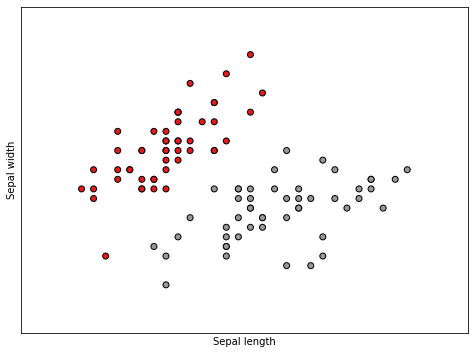

In [133]:
iris= datasets.load_iris()
X=iris.data[:100, :2]
y=iris.target[:100]
y=2*(y-0.5)
y=np.expand_dims(y,1)
x_min,x_max=X[:, 0].min()  -  .5,X[:, 0].max()+ .5
y_min,y_max=X[:, 1].min()  -  .5,X[:, 1].max()+ .5

plt.figure(2, figsize=(8,6))
plt.clf()

plt.scatter(X[:, 0], X[:, 1],c=y,cmap=plt.cm.Set1,edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

In [134]:
K=np.matmul(X,X.T)+np.identity(len(y))*1e-12

In [135]:
alpha=cp.Variable(shape=y.shape)
Kcp = cp.Parameter(shape=K.shape,PSD=True,value=K)
beta= cp.multiply(alpha,y)

In [136]:
#Funcion objetivo para minimizar
L= 0.5*cp.quad_form(beta,Kcp)- np.ones(len(y))@alpha

#Restricciones
const=[y.T@alpha==0,-alpha<=np.zeros(alpha.shape),alpha<=100*np.ones(shape=alpha.shape)]

In [137]:
prob= cp.Problem(cp.Minimize(L),const)

In [138]:
result=prob.solve()

In [139]:
#Hiperplano
w=X.T@(alpha.value * y)
idx=alpha.value>1e-5
b=y[idx.flatten()]-X[idx.flatten()]@w
b=b[0]

In [140]:
def clasificador(x):
	return x@w+b

([], <a list of 0 Text major ticklabel objects>)

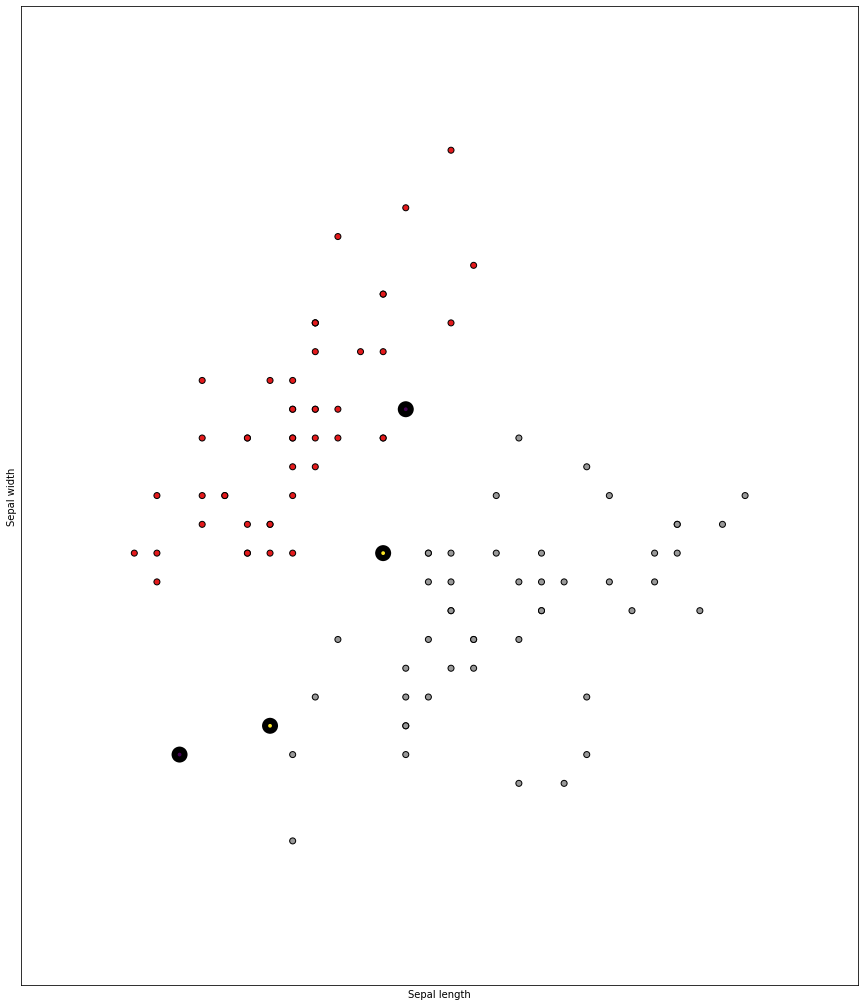

In [141]:
plt.figure(2, figsize=(15,18))
plt.clf()
plt.scatter(X[:, 0], X[:, 1],c=y,cmap=plt.cm.Set1,edgecolor='k')
plt.scatter(X[idx.flatten(), 0], X[idx.flatten(), 1],c=y[idx.flatten()],linewidths=10,edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

In [142]:
#np.sum(np.sign(clasificador(X))==y)